In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports the excel sheet into a pandas dataframe
title = "29June2020_(2)"
trainingData = pd.read_excel("/content/drive/MyDrive/CI Project/Copy_of_" + title + ".xlsx")

In [ ]:
#removes the last row of the training data becuase it doesn't contain data
trainingData = trainingData.iloc[:-1 , :]
trainingData

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,P501.Status,P502.Status,MV501.Status,MV502.Status,MV503.Status,MV504.Status,P6_STATE,FIT601.Pv,P601.Status,P602.Status
0,2020-06-29 13:30:00,1,613.4814,0,1,1,1,1,0.000256,6.953345,...,1,1,1,1,1,1,1,0.000256,1,1
1,2020-06-29 13:30:01,1,613.6776,0,1,1,1,1,0.000256,6.953345,...,1,1,1,1,1,1,1,0.000256,1,1
2,2020-06-29 13:30:02,1,613.7561,0,1,1,1,1,0.000256,6.953345,...,1,1,1,1,1,1,1,0.000256,1,1
3,2020-06-29 13:30:03,1,613.795349,0,1,1,1,1,0.000256,6.953345,...,1,1,1,1,1,1,1,0.000256,1,1
4,2020-06-29 13:30:04,1,613.716858,0,1,1,1,1,0.000256,6.953345,...,1,1,1,1,1,1,1,0.000256,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,2020-06-29 15:29:55,3,655.0893,0,1,2,1,2,2.323904,34.254036,...,2,1,2,2,1,1,2,0.00032,1,1
7196,2020-06-29 15:29:56,3,654.461243,0,1,2,1,2,2.32762,34.254036,...,2,1,2,2,1,1,2,0.00032,1,1
7197,2020-06-29 15:29:57,3,653.9117,0,1,2,1,2,2.331977,34.254036,...,2,1,2,2,1,1,2,0.00032,1,1
7198,2020-06-29 15:29:58,3,653.3622,0,1,2,1,2,2.337231,34.254036,...,2,1,2,2,1,1,2,0.00032,1,1


In [ ]:
#converts the dates and times to a list of seconds starting at 0
timeList1 = []
for x in trainingData['t_stamp']:
  timeList1.append(x.timestamp())

s = timeList1[0]
timeList = []
for x in timeList1:
  timeList.append(x - s)

print(timeList)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

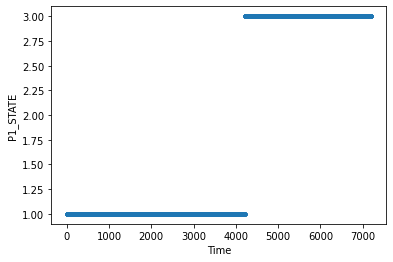

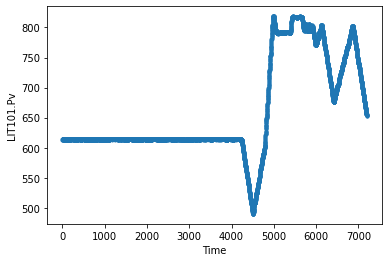

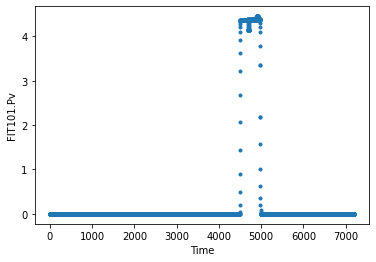

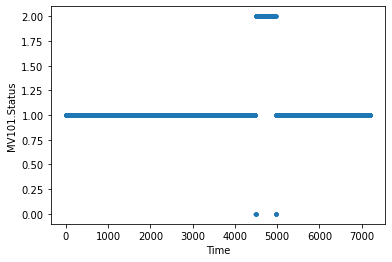

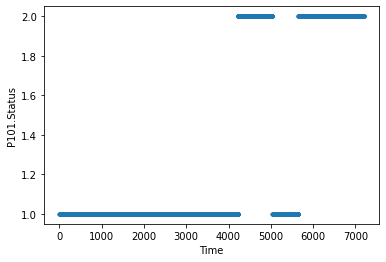

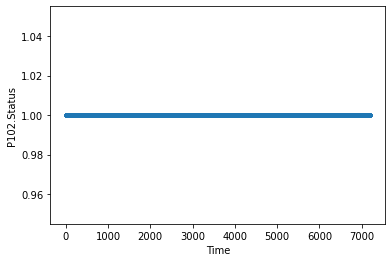

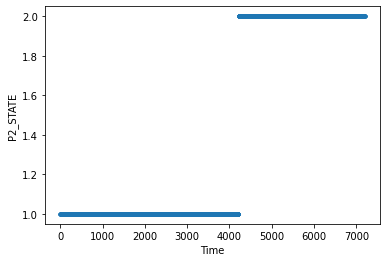

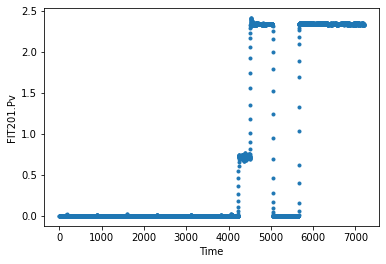

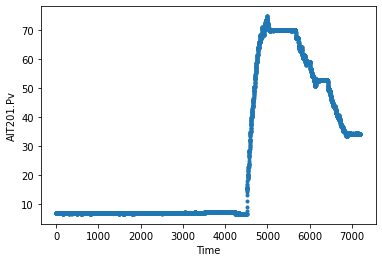

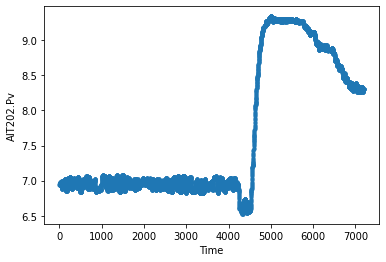

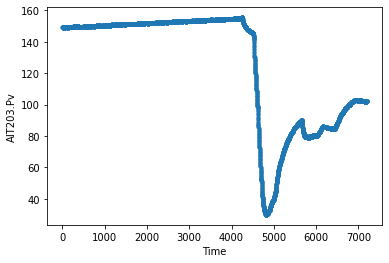

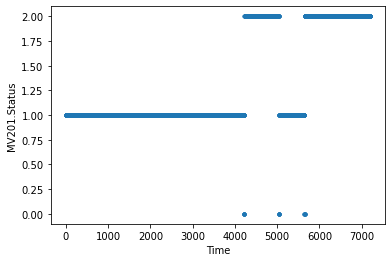

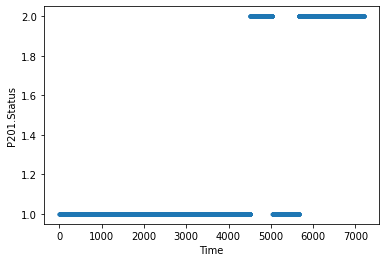

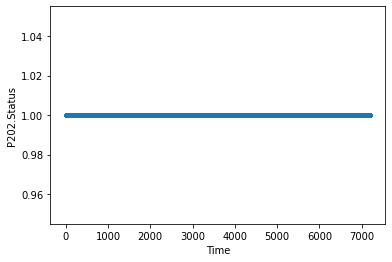

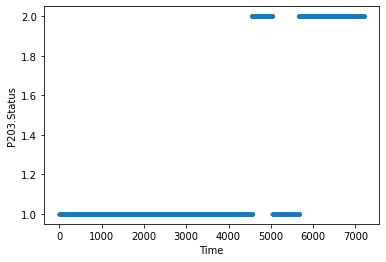

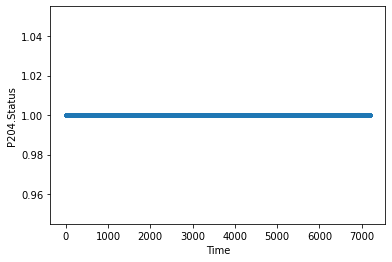

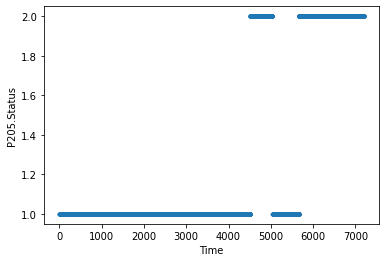

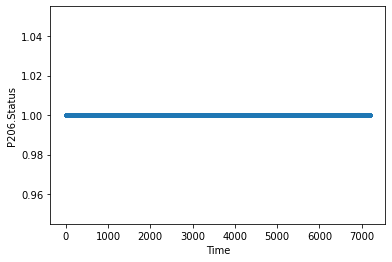

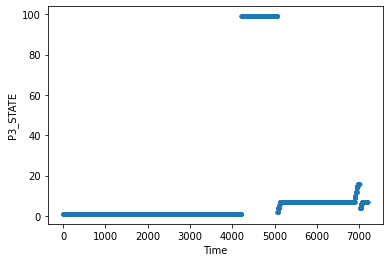

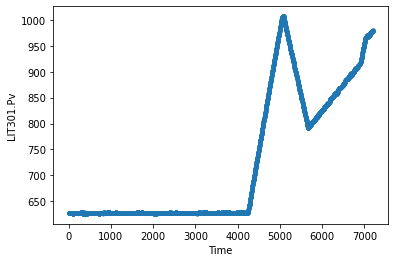

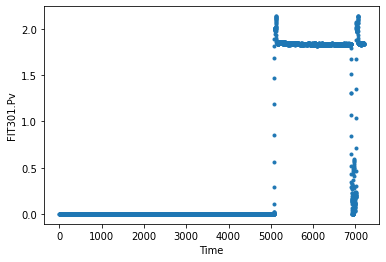

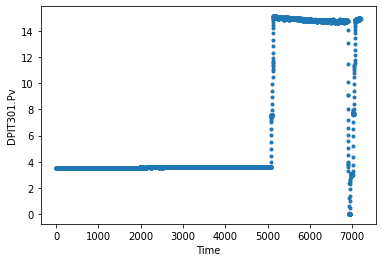

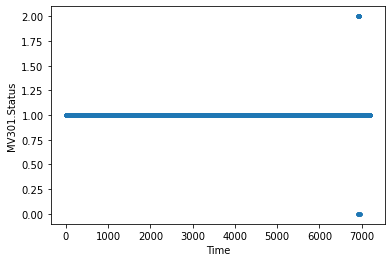

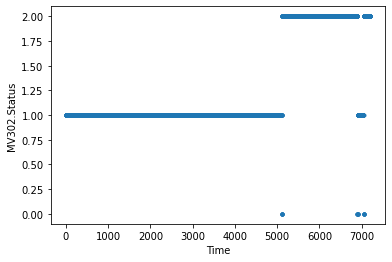

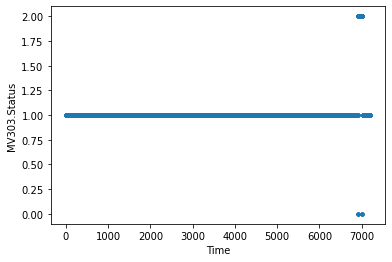

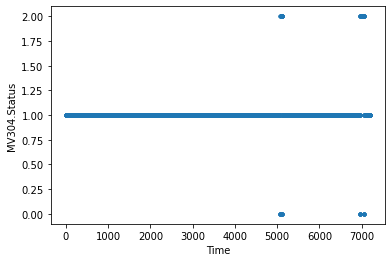

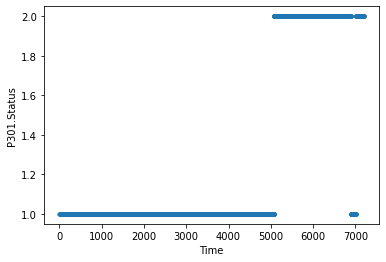

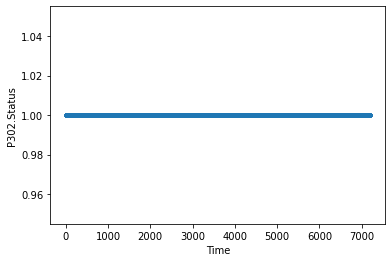

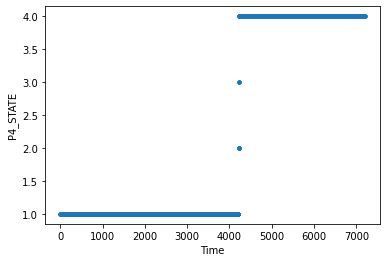

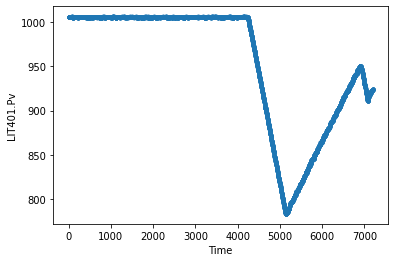

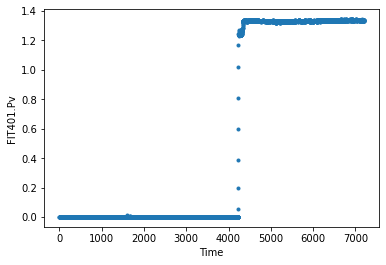

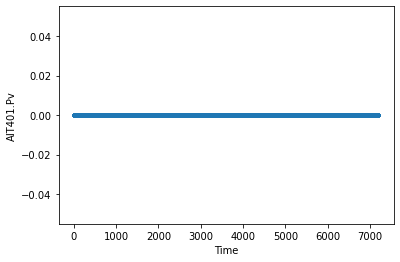

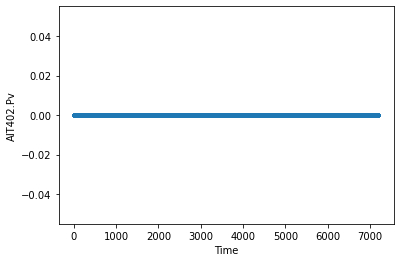

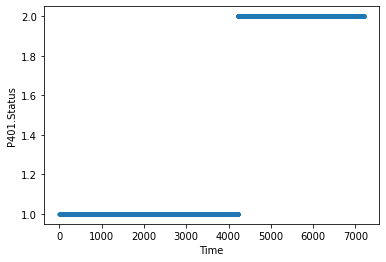

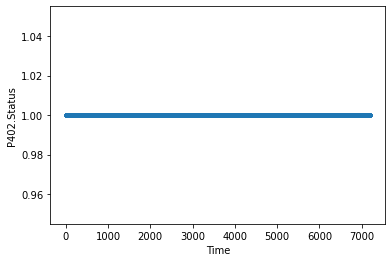

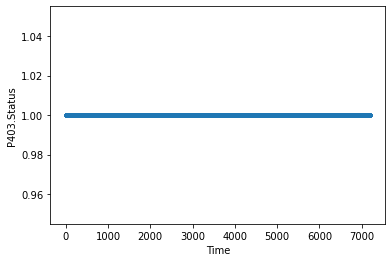

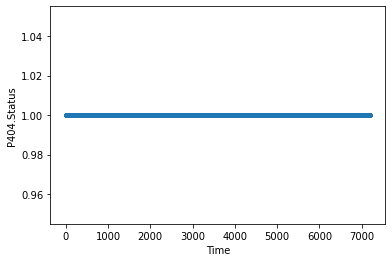

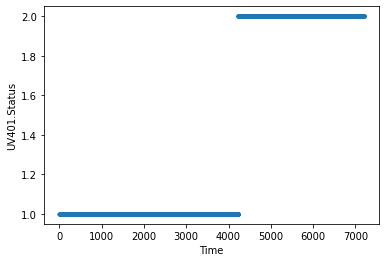

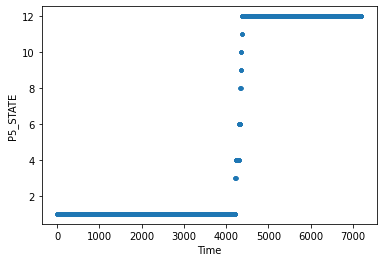

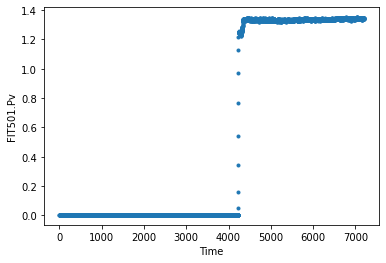

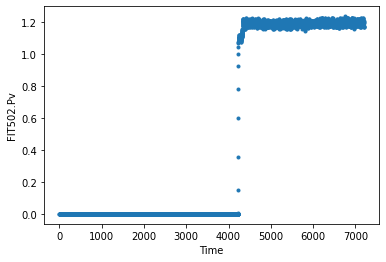

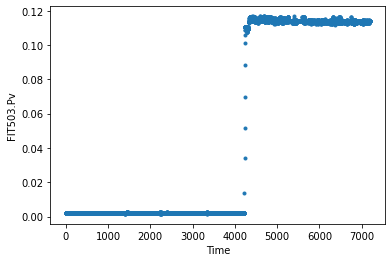

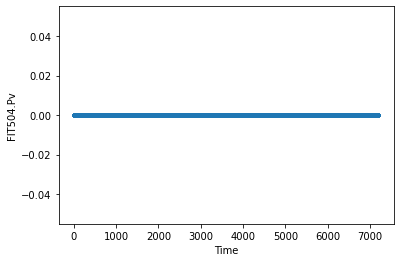

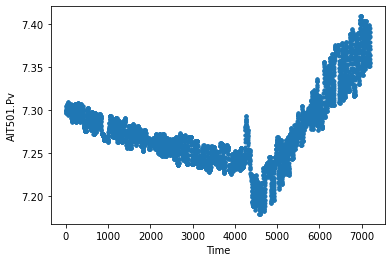

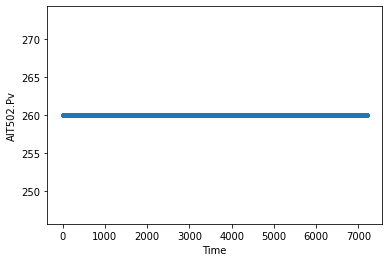

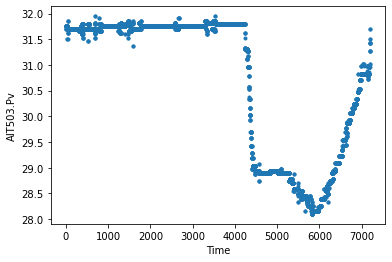

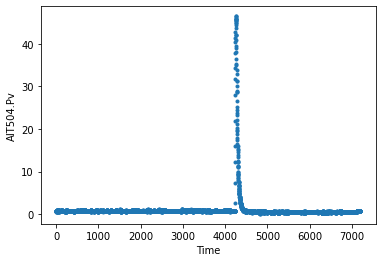

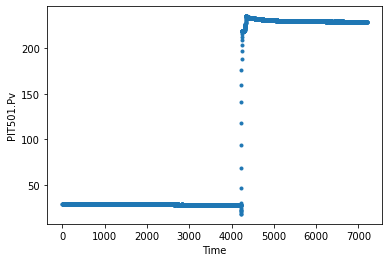

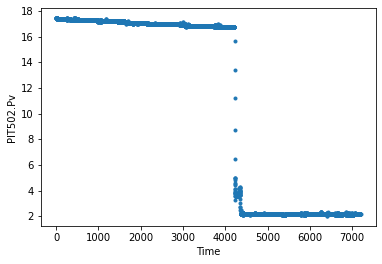

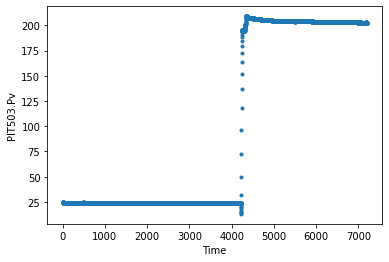

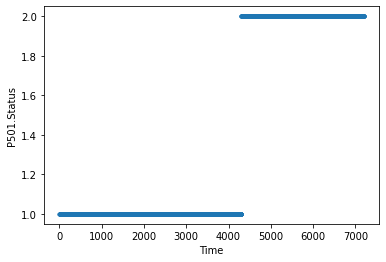

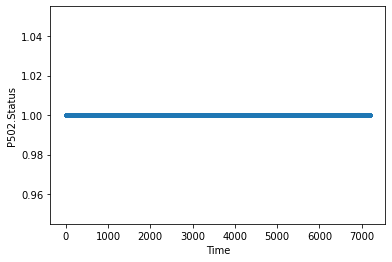

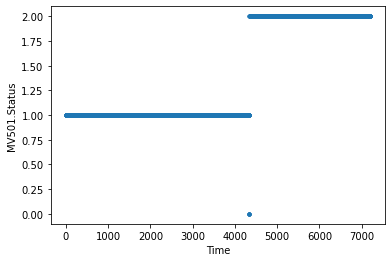

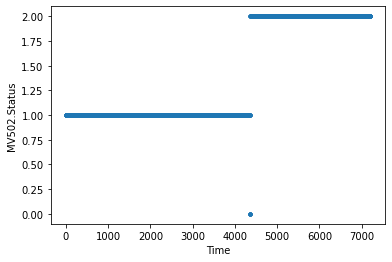

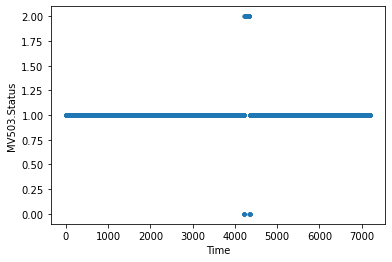

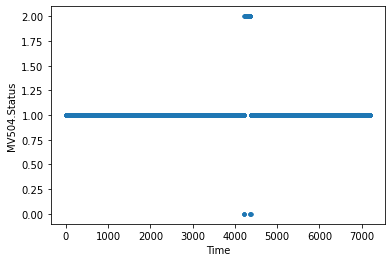

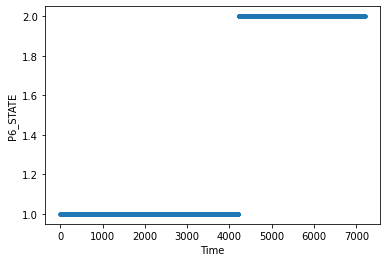

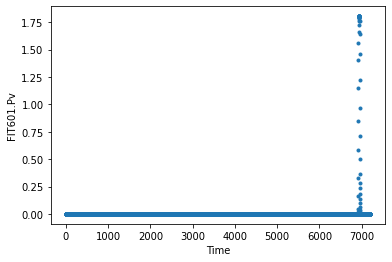

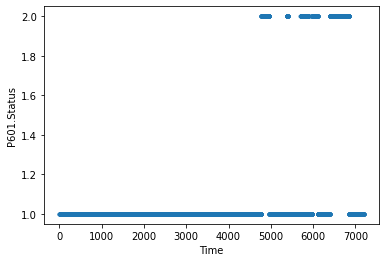

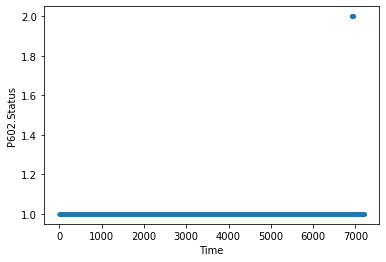

In [ ]:
#converts timeList to a numpy array stored as the x variable
x = numpy.array(timeList)

#iterates over each sensor column in the dataframe to graph its data to the time
for index in trainingData.columns[1:]:
  y = trainingData[index].to_numpy() #converts the column at index from the pandas dataframe to a numpy array
  plt.xlabel("Time")
  plt.ylabel(index)
  plt.scatter(x, y, marker=".")
  plt.show()


#DECEMBER 2015 ATTACK DATASET#
This data set goes along with an archived list of recorded attacks that were preformed within the time that the Dec_2015 data was measured.

In [ ]:
title = "dec_2015_attack"
df = pd.read_excel("/content/drive/MyDrive/CI Project/" + title + ".xlsx")
df.columns = df.iloc[0]
df = df.iloc[1: , 1:-1] # remove the first and last column
print(df) # this is commented out becuase it would take a long time to print the data set

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


0         FIT101    LIT101  MV101 P101 P102    AIT201    AIT202    AIT203  \
1       2.427057  522.8467      2    2    1  262.0161  8.396437  328.6337   
2       2.446274   522.886      2    2    1  262.0161  8.396437  328.6337   
3       2.489191  522.8467      2    2    1  262.0161  8.394514  328.6337   
4        2.53435  522.9645      2    2    1  262.0161  8.394514  328.6337   
5        2.56926  523.4748      2    2    1  262.0161  8.394514  328.6337   
...          ...       ...    ...  ...  ...       ...       ...       ...   
449915  2.559972  519.5495      2    2    1  168.0979  8.638683  301.9226   
449916  2.549082  520.4131      2    2    1  168.0979  8.638683  301.9226   
449917  2.531467  520.6878      2    2    1  168.0979  8.638683  301.9226   
449918  2.521218  520.7271      2    2    1  168.0979  8.638683  301.9226   
449919  2.501681  521.1196      2    2    1  168.0979  8.638683  301.9226   

0         FIT201  MV201  ...    FIT504 P501 P502    PIT501    PIT502  \
1  

In [ ]:
df.loc[[1]]

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
1,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1


In [ ]:
attackTimes = ['10:44:53', '10:58:30','11:28:22', '11:54:08', '12:04:10','12:15:33','13:26:13','14:19:00','14:28:20','11:15:17','11:42:50','12:02:00','14:50:08','18:15:01','18:22:17','18:42:00','23:03:00','01:54:10','09:56:28','10:12:01','17:29:00','01:45:18','11:15:27','15:34:00','16:07:10','22:11:40','10:46:00','14:28:35','17:14:20','17:26:56','22:25:00','11:24:50','11:36:18','11:50:28','11:56:38','13:40:56']
attackIndex = [2694, 3511, 5303, 6849, 7451, 8134, 12374, 15541, 16101, 47718, 49371, 50521, 53409, 72902, 73338, 74521, 90181, 93251, 129389, 130321, 156541, 179119, 220528, 236041, 238031, 259901, 261961, 261879, 285261, 286017, 303820, 307412, 308098, 308948, 309318, 315576]
colors = []
attackMark = []
index = 0;


for i in range(0, df.shape[0]):
  if (attackIndex[index] == i):
    index = index + 1
    colors.append('red')
  else:
    colors.append('blue')

for i in range(0,11):
  attackMark.append('red')

for i in range (5, len(colors) - 5):
  if(colors[i] == 'red'):
    for j in range(-5, 5):
      colors[i + j] = 'red'
    i = i + 5

print(len(colors))



449919


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


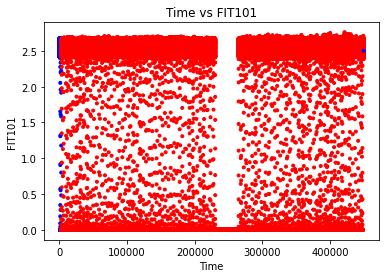

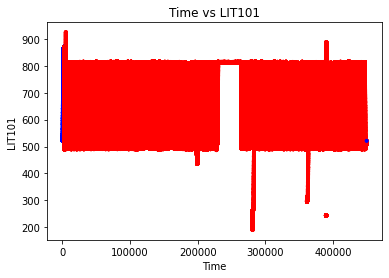

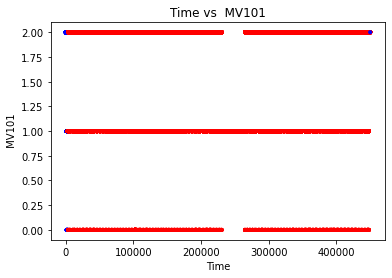

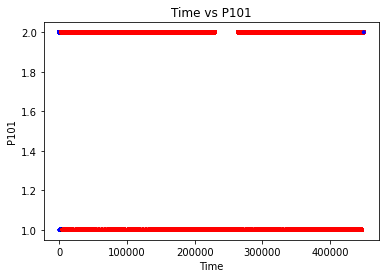

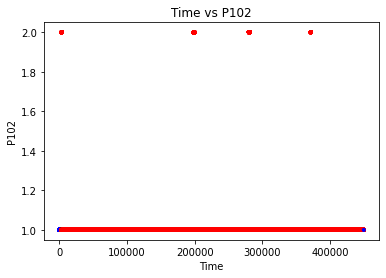

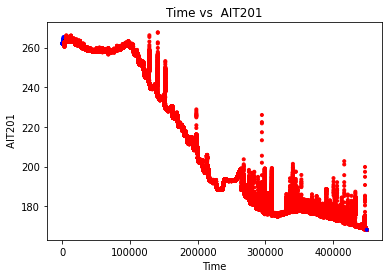

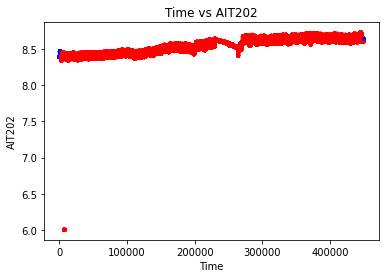

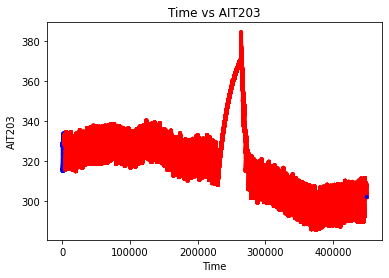

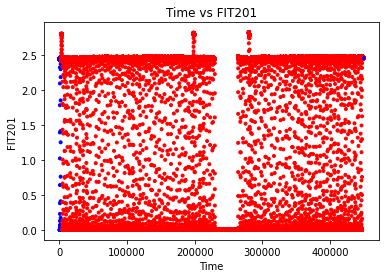

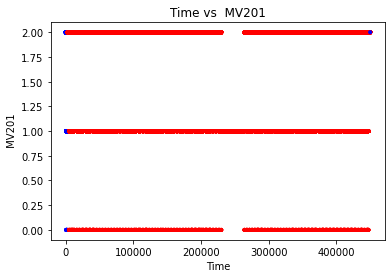

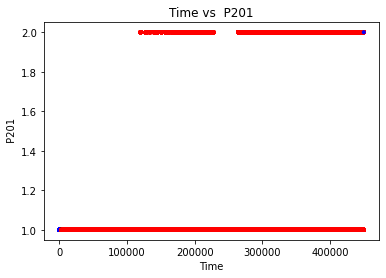

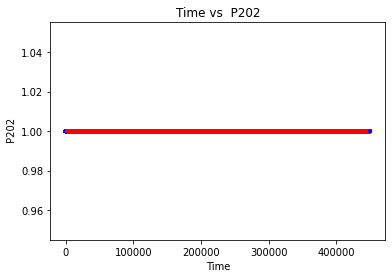

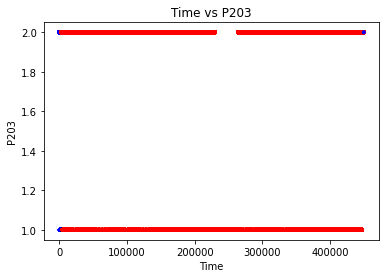

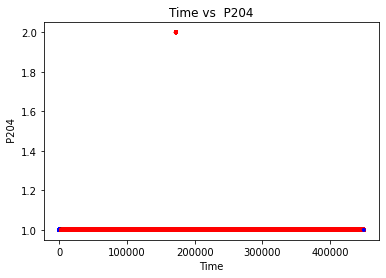

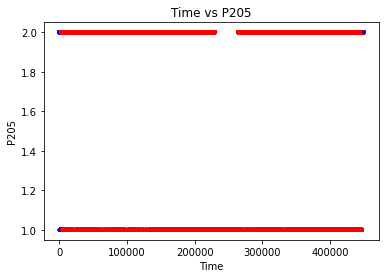

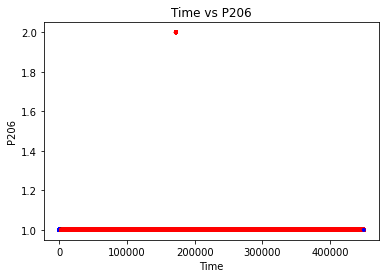

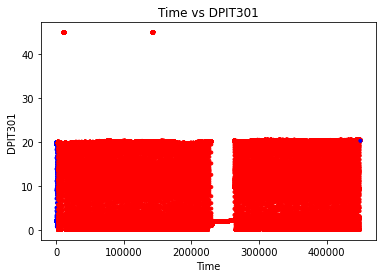

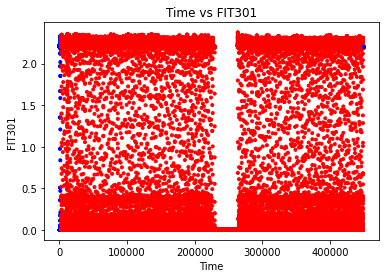

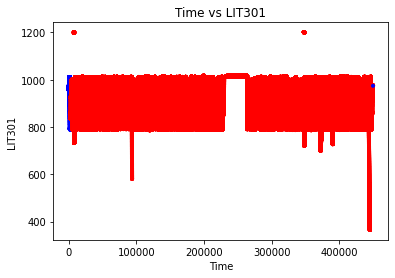

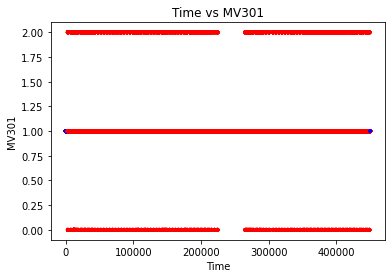

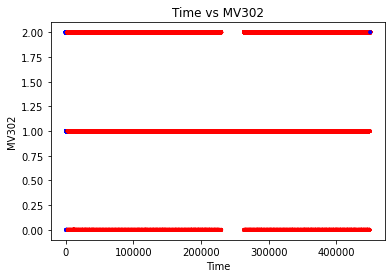

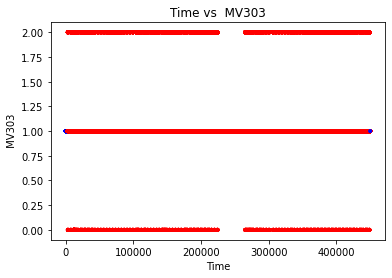

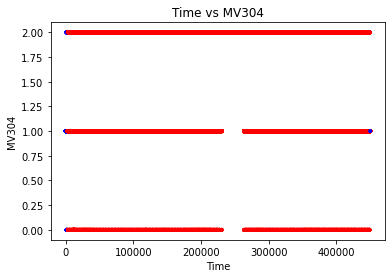

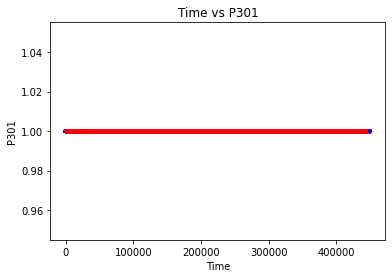

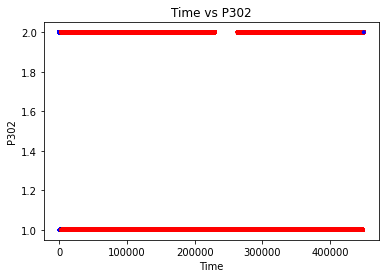

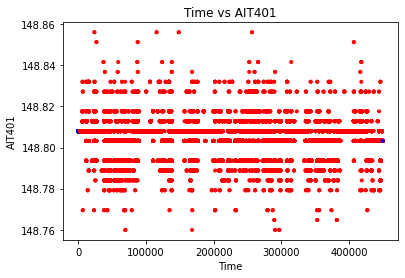

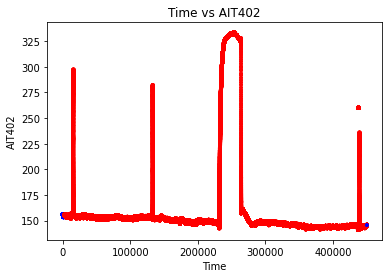

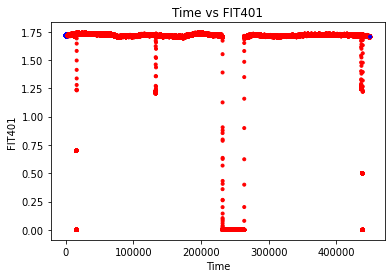

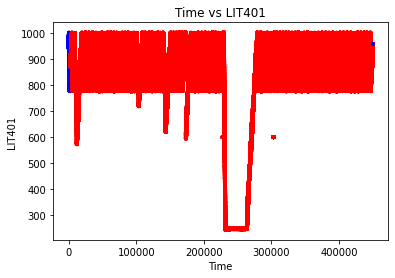

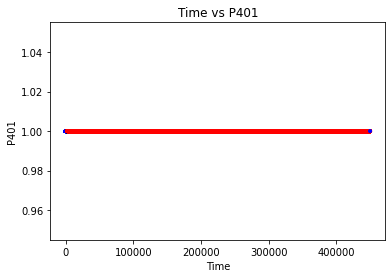

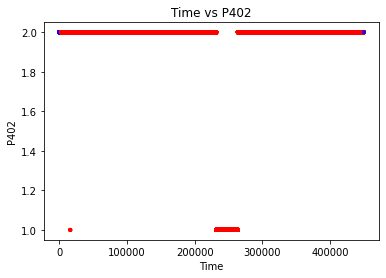

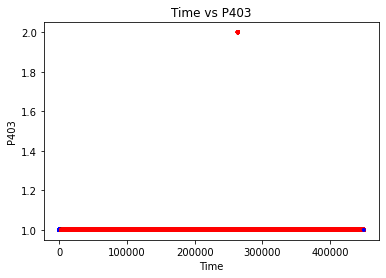

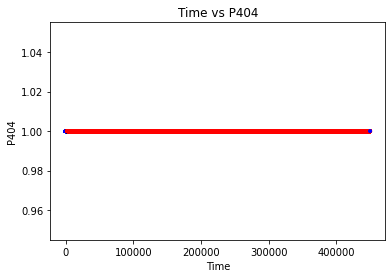

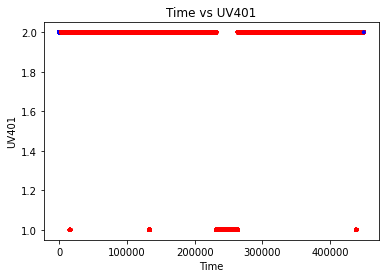

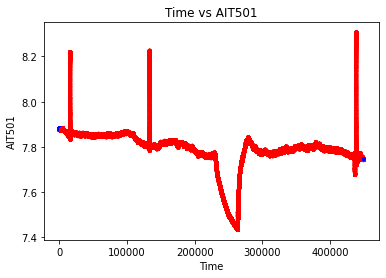

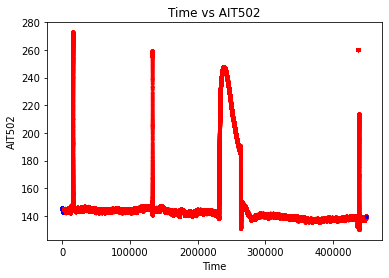

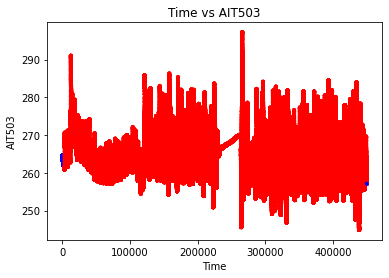

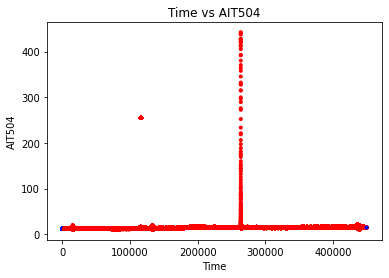

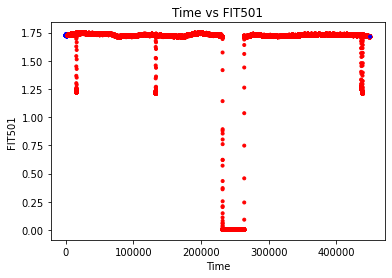

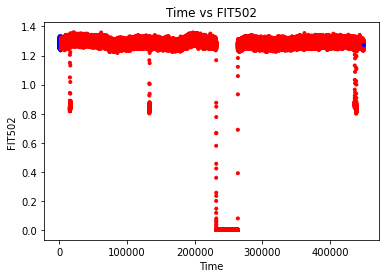

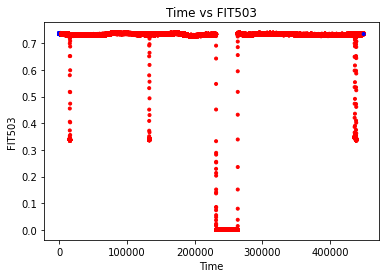

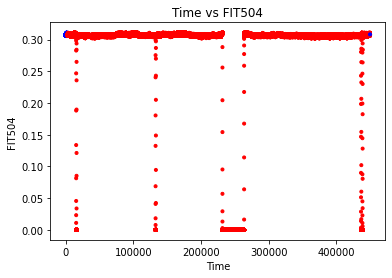

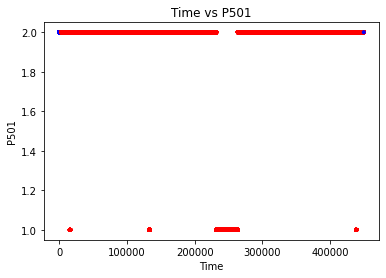

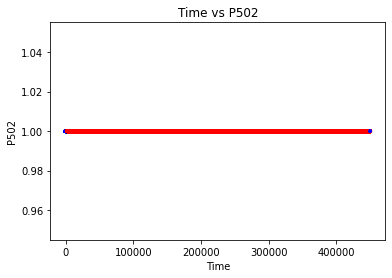

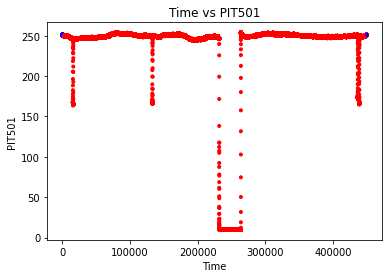

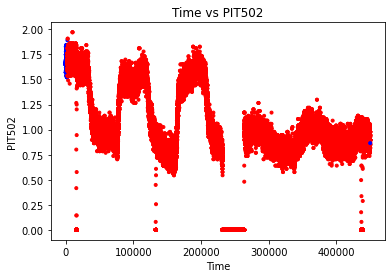

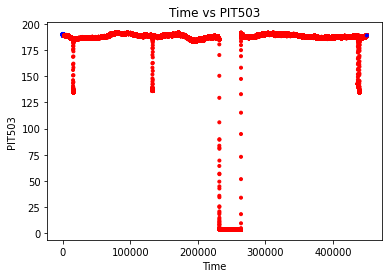

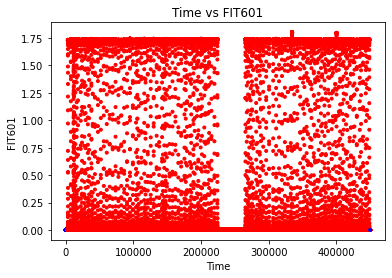

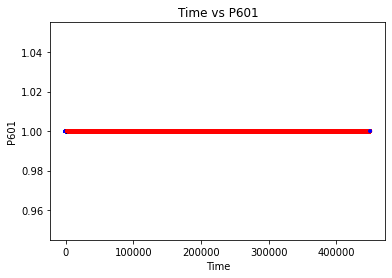

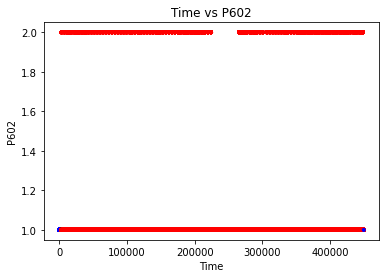

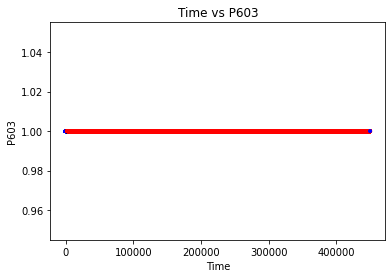

In [ ]:
# this code block creates a graph for each column with respect to time
# then, we add each created figure to a list for all of the plots

plotList = []
x = numpy.array(list(range(0, df.shape[0]))) # get the array of timestamps for x-axis
for index in df.columns:
 y = df[index].to_numpy() # get every column for the y-axis

 fig = plt.figure() # intialize the fig
 plt.title("Time vs " + index)
 plt.xlabel("Time")
 plt.ylabel(index)
 plt.scatter(x, y, c=colors, marker=".")

 plotList.append(fig) # add the fig to the plot list

In [ ]:
# pdf = PdfPages(title + ".pdf") # create a pdf document
# for plot in plotList:
#   pdf.savefig(plot, orientation="landscape") # save plot to pdf

# pdf.close()